In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta
from mpl_toolkits.mplot3d import Axes3D

In [17]:
#DataFlair - Read the data
df=pd.read_csv('patient.csv')
df.head()


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


In [21]:
df.shape

(4212, 14)

In [25]:
# type casting : object -> datetime
df.confirmed_date = pd.to_datetime(df.confirmed_date)

# get daily confirmed count
daily_count = df.groupby(df.confirmed_date).id.count()

# get accumulated confirmed count
accumulated_count = daily_count.cumsum()

In [29]:
#daily_count

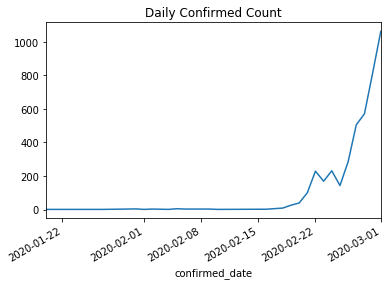

In [30]:
daily_count.plot()
plt.title('Daily Confirmed Count');

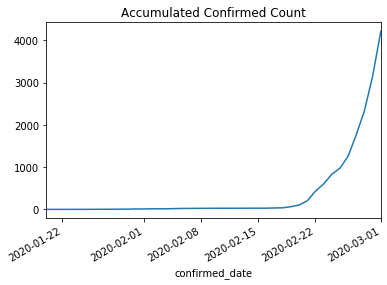

In [32]:
accumulated_count.plot()
plt.title('Accumulated Confirmed Count');

In [33]:
# fill missing dates with zero
data = daily_count.resample('D').first().fillna(0).cumsum()

In [35]:
# use only recent data
data = data[30:]

In [36]:
data

confirmed_date
2020-02-19      65.0
2020-02-20     104.0
2020-02-21     204.0
2020-02-22     433.0
2020-02-23     602.0
2020-02-24     833.0
2020-02-25     976.0
2020-02-26    1261.0
2020-02-27    1766.0
2020-02-28    2337.0
2020-02-29    3150.0
2020-03-01    4212.0
Freq: D, Name: id, dtype: float64

In [37]:
# prepare data for regressor
x = np.arange(len(data)).reshape(-1, 1)
y = data.values

In [40]:
# train simple MLPRgressor
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

In [41]:
# predict accumlated cofirmed count over the week
test = np.arange(len(data)+7).reshape(-1, 1)
pred = model.predict(test)

In [42]:
# get time sequence data as pd.Series
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

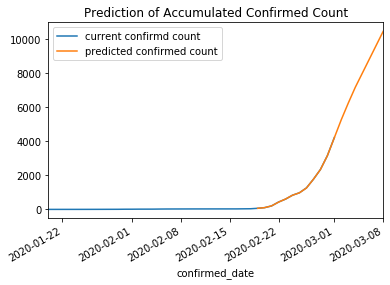

In [43]:
# plot predicted data
accumulated_count.plot()
predicted_count.plot()

plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()

In [44]:
# print predicted data
print(predicted_count[-7:])

2020-03-02     5264
2020-03-03     6235
2020-03-04     7156
2020-03-05     7976
2020-03-06     8796
2020-03-07     9616
2020-03-08    10436
dtype: int64
